# The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
# Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.

Explore and analyze the data to discover key factors responsible for app engagement and success.

Let's take a look at the data, which consists of two files:

- playstore_data.csv: contains all the details of the applications on Google
Play. There are 13 features that describe a given app.
- user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

Before going into data we will analysis the following observation .
1. Getting the average Rating of the Apps.
2.Checking the count of application in each category
3.Getting the number of installs in each Category
4.Checking Corelation
5. Getting App Size Distribution
6. Getting the number of installs with respect to the size of the application
7. Lets see the major Type of app distribution in playstore.
8. lets see the apps dependence on size and type and it effect on rating too.
9.Review sentiments in all the app dataset.
10.Let's see a more depth understanding of sentiment Polarity and Subjectivity.
11.Does sentiments Polarity is proportional to sentiments subjectivity .

#**Playstore Analysis EDA**

## Importing the required module and dataset from drive and read the csv file

In [ ]:
#Mounting the Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#mapping paths
playstore_data='/content/drive/MyDrive/Copy of Play Store Data.csv'
userreview_data='/content/drive/MyDrive/Copy of User Reviews.csv'
df_playstore_data=pd.read_csv(playstore_data)
df_user_review=pd.read_csv(userreview_data)

#Basic Inspection of the *Dataset*

In [ ]:
df_playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df_playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df_playstore_data.shape

(10841, 13)

In [ ]:
df_playstore_data.columns


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

**let's have a look at our dataset :-**



* App :- Name of the App
* Category :- Category under which the App falls.
* Rating :- Application's rating on playstore
* Reviews :- Number of reviews of the App.
* Size :- Size of the App.
* Install :- Number of Installs of the App
* Type :- Whether the App is free/paid
* Price :- Price of the app (0 if it is Free)
* Content Rating :- Appropriate Target Audience of the App.
* Genres:- Genre under which the App falls.
* Last Updated :- Date when the App was last updated
* Current Ver :- Current Version of the Application
* Android Ver :- Minimum Android Version required to run the App

As we can here there are Null data as well as the Dtypes are Objects .
In order to to perform an Exploratory Data Analysis on this DataFrame we need to convert them into numerical data 

In [ ]:
#lets us see the second dataframe too.
df_user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
df_user_review['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [ ]:
df_user_review.shape

(64295, 5)

there are many null value in this review dataframe and also in large number so we canot drop them and also some column like translated review cannot 
be changed or can be added because of the string comments.

# Datacleaning 

##*Data Cleaning and Handling the NaN values in the Data Set**


* We saw and also got the information about the dataset. Now we have to clean that attributes which have not to be useful.Data Cleaning is one of the most essential part of data analysis.
* We have to Replace all the Null values with the Average of their Columns or with not null values.

In [ ]:
df_playstore_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**The number of null values are:**

Rating has 1474 null values which contributes almost 14% of the data. Type and Content_Rating contributes 0.01% null values of the data. Current_Ver has 8 null values which contributes 0.07% of the data. Android_Ver contributes 0.03% null values of the data.

* Let's first deal with the columns which contains higher number of NaN values.By going through the NaN values, we must come up with a way to replace them with non NaN values because it is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis.
* We can replace the null values the aggregate (mean or median) of the remaining values in the Rating column.

**Rating: This column contains 1474 NaN values**

We can replace the null values the aggregate (mean or median) of the remaining values in the Rating column.


In [ ]:
#Replacing NULL values in rating by their Mean values
df_playstore_data['Rating'].fillna(df_playstore_data['Rating'].mean().round(1),inplace=True)

In [ ]:
#rounding off the decimals of rating to 1
#df_playstore_data['Rating']=df_playstore_data['Rating'].round(1)

In [ ]:
#we know that the rating of any app in the play store will be in between 1 and 5.
#Lets check whether there are any ratings out of this range and remove the rating wich is greater than 5.
ps=df_playstore_data[df_playstore_data['Rating']>5].index[0]
print(ps)
df_playstore_data=df_playstore_data.drop(10472)

10472


Now we need to remove extra objects and letter from the data set for making parsing to happen and then convert them from object to numeric form

In [ ]:
df_playstore_data['Category']=df_playstore_data['Category'].replace("1.9",np.nan)
df_playstore_data['Price']=df_playstore_data['Price'].replace('Everyone','0')
df_playstore_data['Installs']=df_playstore_data['Installs'].replace('Free','0')
df_playstore_data['Rating']=df_playstore_data['Rating'].replace(19,1.2)

Current Ver and Android Ver Null value

There are total 8 NaN values in Current Ver and 2 NaN Android Ver



In [ ]:
# The rows containing NaN values in the Current Ver column
ps_null=df_playstore_data[df_playstore_data["Current Ver"].isnull()]
ps_null

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.2,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.2,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.2,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.2,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [ ]:
# Finding the different values the 'Current Ver' column takes
ps_count=df_playstore_data['Current Ver'].value_counts()
ps_count

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: int64

In the Current Var Column there is no any particular value which replace the NAN values so we can replace it from dataframe due to less contribution. or we can replace it from it's last version.



In [ ]:
df_playstore_data["Current Ver"] = np.where(df_playstore_data['Current Ver'] == "NaN", df_playstore_data['Current Ver'], df_playstore_data['Android Ver'])
df_playstore_data[df_playstore_data["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",NaN,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",NaN,NaN


So, there is no andorid version and also no current so we will only the data which are not null in current version which will eliminate all the null value and also it is in v small number not contributing much so it will be ok to drop.


In [ ]:
df_playstore_data=df_playstore_data[df_playstore_data['Current Ver'].notna()]

In [ ]:
#lets see the type ( 1 null value) and try to clean it.
df_playstore_data[df_playstore_data['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.2,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
#as we can see the price of the app is 0 so it will be free 
df_playstore_data.loc[9148,"Type"]='Free' 

In [ ]:
df_playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10838 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10838 non-null  object 
 1   Category        10838 non-null  object 
 2   Rating          10838 non-null  float64
 3   Reviews         10838 non-null  object 
 4   Size            10838 non-null  object 
 5   Installs        10838 non-null  object 
 6   Type            10838 non-null  object 
 7   Price           10838 non-null  object 
 8   Content Rating  10838 non-null  object 
 9   Genres          10838 non-null  object 
 10  Last Updated    10838 non-null  object 
 11  Current Ver     10838 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.4+ MB


So, we can see the complete dataframe is null free and of all has the value of '10838' now we will start doing.

# Data manipulation and Handling Duplicate Data.

In [ ]:
df_playstore_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4.0.3 and up,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",4.2 and up,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",4.1 and up,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",4.1 and up,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.2,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",2.2 and up,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
# Pandas to_datetime() function applied to the values in the last updated column helps for converting string Date time into Python Date time object.
df_playstore_data['Last Updated'] = pd.to_datetime(df_playstore_data['Last Updated'])

In [ ]:
def kb_to_mb_converter(value):
  if 'M' in value:
    return float(value[:-1])
  elif 'K' in value:
    return float(value[:-1]/1024)
  else:
    return 0 

df_playstore_data["Size"]=df_playstore_data["Size"].apply(lambda x: kb_to_mb_converter(x))
df_playstore_data['Size'] =df_playstore_data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

In [ ]:
'''
This function removes all the extra objects from individual numerics so
that they can be converted into numeric form
'''
def remover(num):
  if '+' in num:
    num = num.replace('+','')
  if ',' in num:
    num = num.replace(',','')
  if '$' in num:
    num = num.replace('$','')
  if 'NaN' in num:
    num = '0'

  else:
    pass
  return num

In [ ]:
#Changing the 'Installs' column values into valid numeric values
df_playstore_data['Installs'] = pd.to_numeric(df_playstore_data['Installs'].map(lambda x: remover(x)))


#Changing the 'Price' column values into valid numeric values
df_playstore_data['Price'] = pd.to_numeric (df_playstore_data['Price'].map(lambda x:  remover(x)))

#Changing the 'Reviews' column values into valid numeric values
df_playstore_data['Reviews']=pd.to_numeric(df_playstore_data['Reviews'])



In [ ]:
df_playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,4.0.3 and up,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,4.0.3 and up,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,4.0.3 and up,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,4.2 and up,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,4.4 and up,4.4 and up


In [ ]:
df_playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10838 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10838 non-null  object        
 1   Category        10838 non-null  object        
 2   Rating          10838 non-null  float64       
 3   Reviews         10838 non-null  int64         
 4   Size            10838 non-null  float64       
 5   Installs        10838 non-null  int64         
 6   Type            10838 non-null  object        
 7   Price           10838 non-null  float64       
 8   Content Rating  10838 non-null  object        
 9   Genres          10838 non-null  object        
 10  Last Updated    10838 non-null  datetime64[ns]
 11  Current Ver     10838 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.4+ MB


As we can see all the all the Data is cleaned , convert to numeric form is ready for visualization 

# Visualization Part ( Data Exploration )

In [ ]:
#for figure size
plt.rcParams['figure.figsize']=(10,7)

## 1. Getting the average Rating of the Apps 

Text(0.5, 1.0, "Rating's")

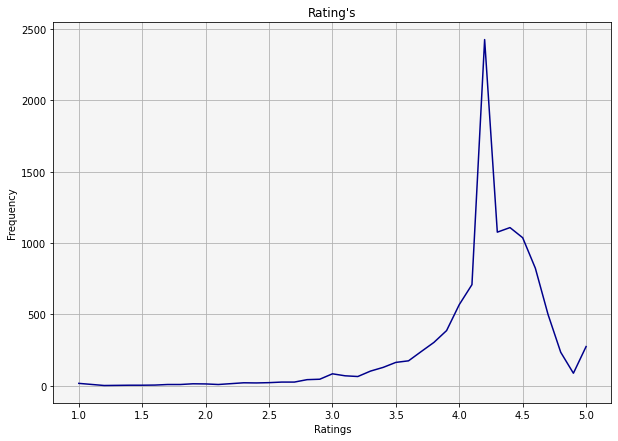

In [ ]:
#visualising the total Ratings from the dataframe
df_playstore_data['Rating'].value_counts().sort_index().plot(kind='line',color='darkblue',linestyle='-').set_facecolor('whitesmoke')
plt.grid(axis='y')
plt.grid(axis='x')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title("Rating's")

**After plotting the Line graph on the Ratings data **
* We can observe a gradual increase in the ratings in the graphical representation

* We can see that the amongst all the apps most of the application have ratings between 4.1 to 4.4 

* Also can be said that as the frequency of app increases the rating also increase or visa-versa. 



In [ ]:
'''
If we calcalute the rating in natural numeric form we get,
Fuction to convert all the ratings into  natural numbers
'''
def rator(rat):
  if 1<=rat<=1.9:
    return 1
  if 2<=rat<=2.9:
    return 2
  if 3<=rat<=3.9:
    return 3
  if 4<=rat<=4.9:
    return 4
  if rat==5:
    return 5


In [ ]:
df_playstore_data['Round_Rating']=df_playstore_data['Rating'].apply(lambda x : rator(x))

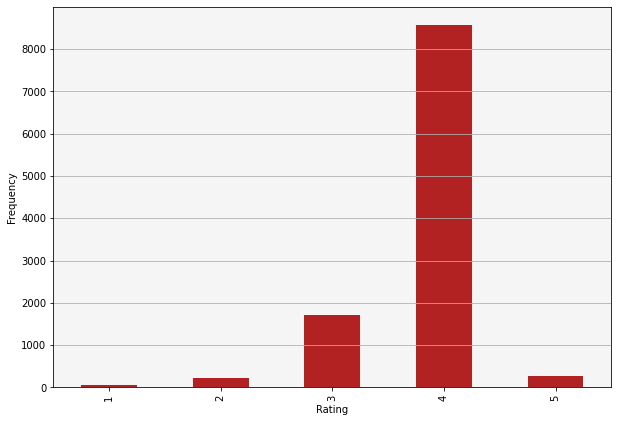

In [ ]:
df_playstore_data['Round_Rating'].value_counts().sort_index().plot(kind='bar',color='firebrick').set_facecolor('whitesmoke')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y')


* There are over 8000 application rated as 4  
* 4* creates a majority in the rating system

##2.Checking the count of application in each category

Text(0, 0.5, 'Categories')

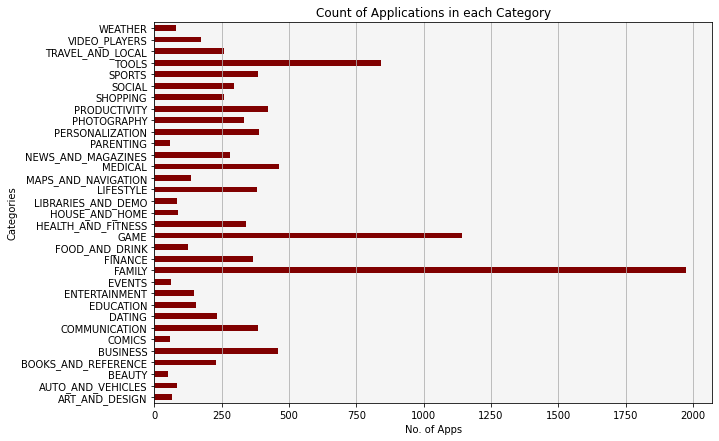

In [ ]:
#Creating a Graph of count of Applications in each category categories
ax=df_playstore_data['Category'].value_counts().sort_index().plot(kind='barh',color='maroon').set_facecolor('whitesmoke')
plt.grid(axis='x')
plt.title('Count of Applications in each Category')
plt.xlabel('No. of Apps')
plt.ylabel('Categories')

As we can see from the above visualisation the two categories Family and games have 
the highest number of applications to download from the play store.

And on the contrary, parenting, beauty, comics are few of the categories with least number of applications to download in play store


##3.Getting the number of installs in each Category

Text(0.5, 1.0, 'Number of Installs in each category')

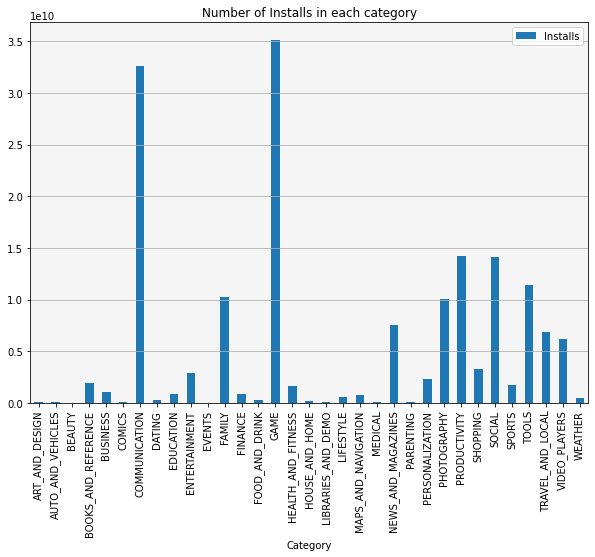

In [ ]:
#Bar graph of Number of installs in each category
category_installs = df_playstore_data.groupby(['Category'])[['Installs']].sum()
category_installs.plot(kind='bar').set_facecolor('whitesmoke')
plt.grid(axis='y')
plt.title('Number of Installs in each category')

Form the data set acquired we can visualize and observe that although family had the highest number of applications in category, the installation of those app as very minimal.

We can observe that Games and Communication have the highest install rates, that is people are downloading Games and Communication application on a greater extent.

And as expected Beauty, comics are on a all time lowest in installs along with events, medical and many more.


##4.Checking Corelation 

In [ ]:
heater=df_playstore_data[['Rating','Reviews','Size','Installs','Price']]
cor=heater.corr()
cor

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.067679,0.043840,0.050814,-0.020125
Reviews,0.067679,1.000000,0.065502,0.643120,-0.009668
Size,0.043840,0.065502,1.000000,-0.003368,-0.013541
Installs,0.050814,0.643120,-0.003368,1.000000,-0.011690
Price,-0.020125,-0.009668,-0.013541,-0.011690,1.000000


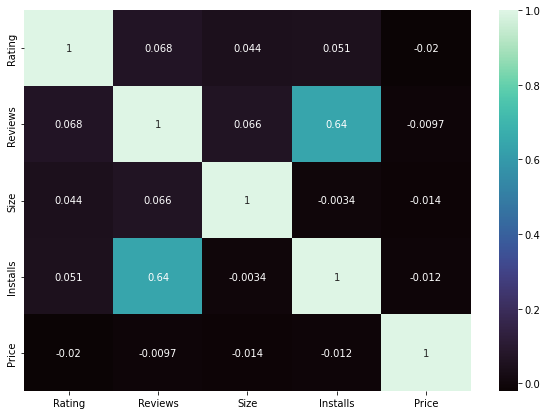

In [ ]:
sns.heatmap(cor,annot=True,cmap='mako')

*We can see here that almost every variable in uncorrelated except **reviews**. Changes in reviews seems to have some effect on number of installs here*

As we can see from the Bar Graph and heatmap that the top 2 categories with most installs are that of ***Communication*** and ***Games*** application
* The **Heatmap** plotted of the Categories shows the color variations of various categories 
* We can see that the ***Communication*** and ***Games*** categories in the heatmap are the most light colours with respect to others reprentating that they are most installed 

##5. Getting App Size Distribution 

In [ ]:
df_playstore_data['Size']=df_playstore_data['Size'].round(1)

In [ ]:
def size_collective(size):
  if 1<=size<=10:
    return 10
  if 11<=size<=20:
    return 20
  if 21<=size<=30:
    return 30
  if 31<=size<=40:
    return 40 
  if 41<=size<=50:
    return 50
  if 51<=size<=60:
    return 60
  if 61<=size<=70:
    return 70
  if 71<=size<=80:
    return 80
  if 81<=size<=90:
    return 90
  if 91<=size<=100:
    return 100
  

In [ ]:
df_playstore_data['Size_collective']=df_playstore_data['Size'].apply(lambda x: size_collective(x) )

Text(0.5, 1.0, 'App size Distribution')

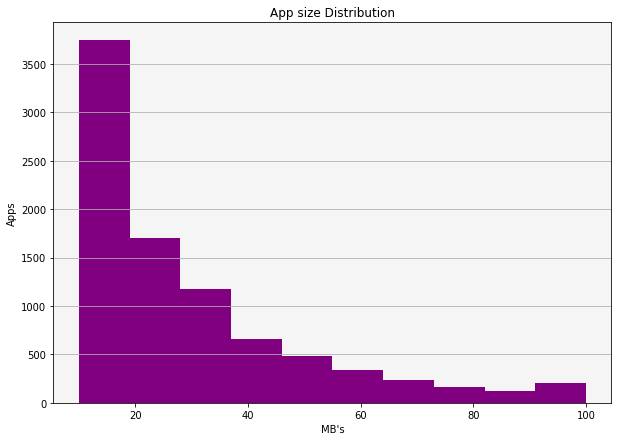

In [ ]:
df_playstore_data['Size_collective'].plot(kind='hist',color='purple').set_facecolor('whitesmoke')
plt.grid(axis='y')
plt.xlabel("MB's")
plt.ylabel('Apps')
plt.title('App size Distribution')

We can see in the visualisation that 10-20 mb size has highest number on application in the Play store and the number gradually decreases when the app size increases resulting in that there are majority application in 10-40 mb size range.

##6. Getting the number of installs with respect to the size of the application

In [ ]:
installs_on_size=df_playstore_data.groupby(['Size_collective'])[['Installs']].sum()

Text(0.5, 0, 'Size Distribution')

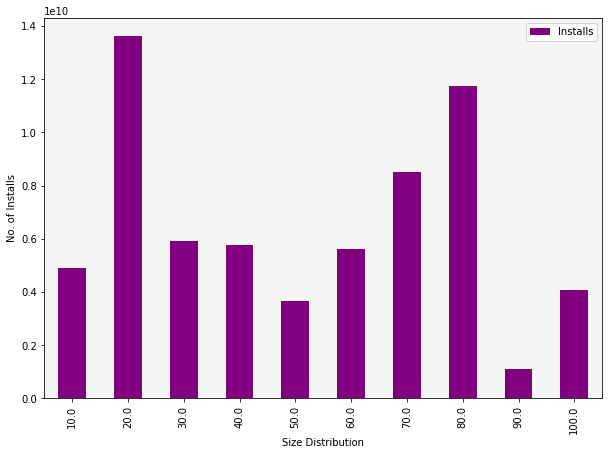

In [ ]:
installs_on_size.plot(kind='bar',color='purple').set_facecolor('whitesmoke')
plt.ylabel('No. of Installs')
plt.xlabel('Size Distribution')

It is a quite interesting observation that although the app distribution in 10 mb bracket is on the higher side the installs is quite less here. 

On the other side the 70 -80 mb bracket has higher installs and the 20mb bracket has the highest installs of all. 


## 7.Lets see the major Type of app distribution in playstore.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


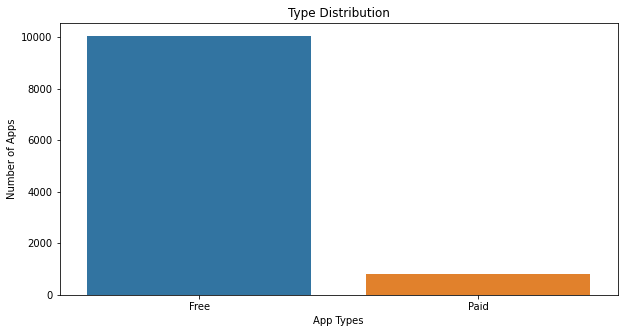

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(df_playstore_data['Type'])
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.xlabel('App Types')
plt.show()

From the plot we can get to known that more of the app in the playstore is free due to which it create major effect in installment or the review and rating. 

## 8.lets see the apps dependence on size and type and it effect on rating  too.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


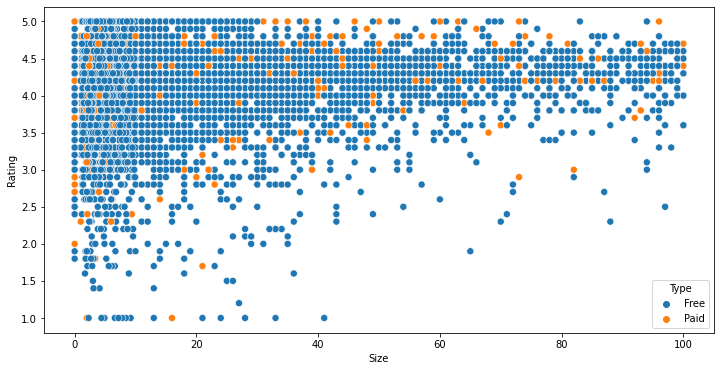

In [ ]:
# show the distribution of apps in term of their rating, size and type
plt.figure(figsize=(12, 6))
sns.scatterplot(df_playstore_data['Size'],
               df_playstore_data['Rating'],
               hue=df_playstore_data['Type'],
               s=50)

From this scatter plot above , we can conculed  that majority of the free apps are small in size and having high rating. 
While for paid apps, we have quite equal distribution in term on size and rating.
so , free app and small size app create much more effect then orthers.

As u all known sentiments play a vital role in rating or review or installment or user expericense so lets look into it and find some relation.
## 9.Review sentiments in all the app dataset. 

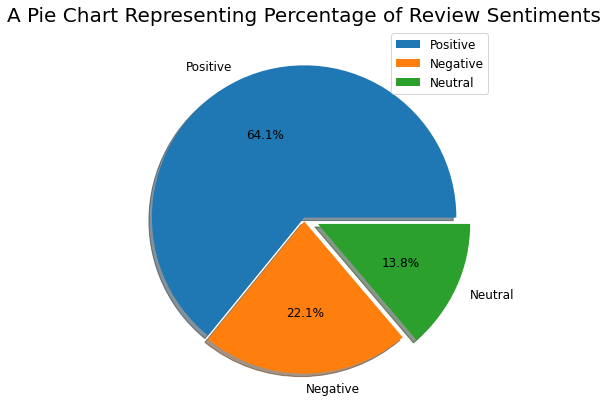

In [ ]:
plt.figure(figsize=(10,7))
slices=df_user_review.Sentiment.value_counts()
labels=['Positive','Negative','Neutral']
explode=[0,0.025,0.1]
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(slices,labels=labels,explode=explode,autopct='%1.1F%%',shadow=True);
plt.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plt.legend()
plt.show();

As we can see it from the pie charts there are 64.1 % of Positive sentiments, 22.1% of Negative sentiments, and 13.8% neutral sentiments.

## 10.Let's see a more depth understanding of sentiment Polarity and Subjectivity.


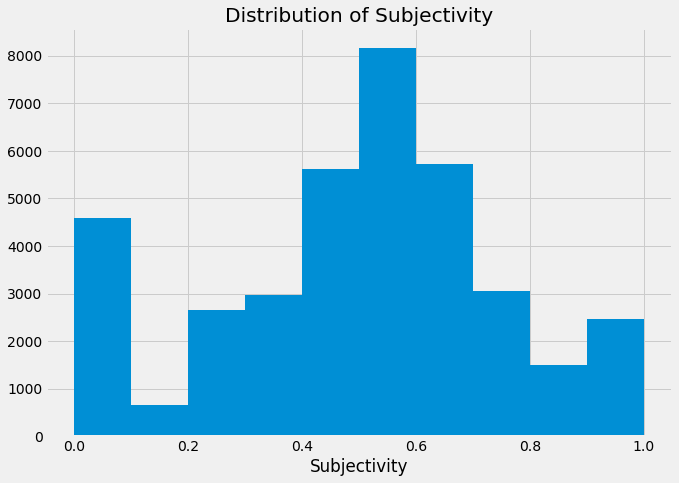

In [ ]:

plt.figure(figsize=(10,7))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(df_user_review.Sentiment_Subjectivity.values)
plt.show();
     

It can be seen that the maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this, we can conclude that the maximum number of the audience give reviews to the applications, according to their experience.

## 11.Does sentiments Polarity is proportional to sentiments subjectivity .

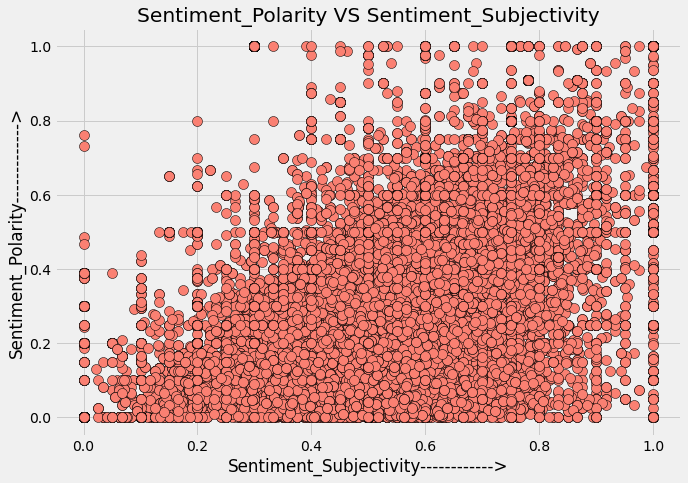

In [ ]:
plt.figure(figsize=(10,7))
y=df_user_review["Sentiment_Polarity"].abs()
x=df_user_review["Sentiment_Subjectivity"].abs()
plt.scatter(x,y,s=100,c="salmon",edgecolor="black")
plt.xlabel("Sentiment_Subjectivity------------>")
plt.ylabel("Sentiment_Polarity------------->")
plt.title("Sentiment_Polarity VS Sentiment_Subjectivity")
plt.show();

From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior.

# Conculsion

With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. This makes the hell lot of competition in App market.

And also we can say that before starting any kind of exploration the data cleaning play a vital role in result and accuracy.

As we all can see the many observations and conclusion that arise from the data visualization and how visualizations make anything interesting with the graphs, plots, chart or maps.

Which simplify the data and can be easily understand the role of the data and their elements in the diverse world of play store.

As per the graphs visualizations shown above, most of the trending apps (in terms of users' installs) are from the categories like GAME, COMMUNICATION, and TOOL even though the amount of available apps from these categories are twice as much lesser than the category FAMILY. The trending of these apps is most probably due to their nature of being able to entertain or assist the user. Besides, it also shows a good trend where we can see that developers from these categories are focusing on the quality instead of the quantity of the apps.

Other then this also can be say that mostly the app has higher number of user installs or review gives the app a good rating and mostly all the apps are around the rating of 4 (8000 apps).Also the size and price of the app create a minute difference but not majorly effect the app with good rating, review even if their app size are high. But due to free in charges we get the higher number of user installs and ratings.

Also, it can be seen from the chart that the sentiments play important role  and maximum number of sentiment which are positive around (64.1 %) lies between subjectivity 0.4 to 0.7. From this, we can conclude that the maximum number of the audience give reviews to the applications, according to their experience.

As, we can see that, why exploring data is important before starting to build ML models.

As a conclusion, we learnt that the current trends in the Android market are mostly from these categories which assisting, communicating or entertaining apps.


In [ ]:
                                                                  ### Thank You ###